In [ ]:
!pip install --upgrade -q gspread
!pip install --quier gspread gspread_dataframe

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 2.5 MB/s eta 0:00:00

Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: --quier


In [ ]:
from google.colab import auth
from gspread_dataframe import get_as_dataframe
import gspread
import seaborn as sns
import matplotlib.pyplot as plt

# Autenticación
auth.authenticate_user()
from google.auth import default
creds, _ = default()

# Autorización
gc = gspread.authorize(creds)

# Abrir la hoja de cálculo
spreadsheet = gc.open_by_url('https://docs.google.com/spreadsheets/d/1Z02Z6xfsr-4bfMBOpxJDNsyoQeOS5FTsCgCN7EiaAos/edit?resourcekey=&gid=1564782808#gid=1564782808')

# Seleccionar la primera hoja
worksheet = spreadsheet.get_worksheet(0)  # Cambia el índice si quieres otra hoja

# Leer los datos como un DataFrame
import pandas as pd
encuestas = pd.DataFrame(worksheet.get_all_records())


# 1.   Lectura de datos




In [ ]:
encuestas = encuestas.drop(columns=['Marca temporal', 'Puntuación'])

In [ ]:
encuestas.columns

Index(['1. ¿Cuál es su rango de edad?', '2. ¿Cuál es su género? ',
       '3. ¿Cuál es su estado civil?  ',
       '4. ¿Realiza algún tipo de seguimiento o monitoreo sobre sus finanzas personales de manera regular?  ',
       '5. En caso de realizar seguimiento, ¿con qué frecuencia lo realiza? (Sí llega a hacer más de 1 seleccione el más importante.)',
       '6. ¿Cuál es su ingreso mensual aproximado?  ',
       '7. ¿Cuál es el origen principal de su ingreso mensual?  ',
       '8. Acerca de la Pensión del Bienestar, ¿Cómo calificaría el impacto de ésta en su vida financiera?  ',
       '9. ¿En qué áreas ha beneficiado más la Pensión del Bienestar su situación financiera? (Puede seleccionar más de una opción)',
       '10. ¿Cuánto gasta aproximadamente al mes en necesidades básicas (alimentación, vivienda, servicios)?  ',
       '11. ¿Cuánto gasta aproximadamente al mes en salud (Medicinas, consultas, seguros médicos, etc.)?  ',
       '12. ¿Cuánto dinero destina aproximadamente a ent

In [ ]:
# Cambiar nombres de columnas para mayor facilidad
encuestas.rename(columns={'1. ¿Cuál es su rango de edad?': 'Edad', '6. ¿Cuál es su ingreso mensual aproximado?  ': 'Ingreso',
                          '8. Acerca de la Pensión del Bienestar, ¿Cómo calificaría el impacto de ésta en su vida financiera?  ': 'Impacto Bienestar',
                          '10. ¿Cuánto gasta aproximadamente al mes en necesidades básicas (alimentación, vivienda, servicios)?  ': 'Necesidades básicas',
                          '11. ¿Cuánto gasta aproximadamente al mes en salud (Medicinas, consultas, seguros médicos, etc.)?  ': 'Salud',
                          '12. ¿Cuánto dinero destina aproximadamente a entretenimiento o actividades recreativas cada mes?  ': 'Entretenimiento',
                          '13. ¿Cuánto gasta aproximadamente al mes en transporte (autobuses, metro, taxi, transporte privado, gasolina, etc.)?  ': 'Transporte',
                          '15. En caso de ahorrar, ¿Cuánto ahorras aproximadamente?': 'Ahorro',
                          '18. ¿Cuál es el monto aproximado de su deuda total?  ': 'Deuda',
                          '19. ¿Cómo calificaría su capacidad para cubrir sus deudas mensualmente?  ': 'Capacidad deudas',
                          '20. ¿Qué tan importante es para usted monitorear sus ingresos y gastos mensuales?': 'Importancia del monitoreo',
                          '22. ¿Cómo calificaría su nivel de conocimiento sobre finanzas personales?  ': 'Conocimiento finanzas',
                          '23. ¿Qué tan satisfecho/a está con su situación financiera actual?  ': 'Satisfacción financiera',
                          '25. ¿Qué tan familiarizado está con el uso de dispositivos digitales?': 'Familiarización dispositivos',
                          '29. En caso de realizar seguimiento de sus finanzas, ¿Considera que le ha ayudado a mejorar su situación económica?  ': 'Ayuda seguimiento'
                          }, inplace=True)


# 2.   Desagrupar datos



## 2.1 Edad

In [ ]:
for i in encuestas['Edad']:
  match i:
    case "60–61 años":
      encuestas.replace(i, 60, inplace=True)
    case "62–63 años":
      encuestas.replace(i, 62, inplace=True)
    case "64–65 años":
      encuestas.replace(i, 64, inplace=True)
    case "66–67 años":
      encuestas.replace(i, 66, inplace=True)
    case "68–69 años":
      encuestas.replace(i, 68, inplace=True)
    case "Más de 69 años":
      encuestas.replace(i, 70, inplace=True)

<ipython-input-6-f6f82808c913>:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  encuestas.replace(i, 64, inplace=True)


## 2.2 Ingreso

In [ ]:
# Tabla de frecuencia
frecuencias_ingreso = encuestas.groupby('Ingreso')['Ingreso'].count()
frecuencias_ingreso

,Ingreso
Ingreso,
"Entre $10,000 y $15,000",4
"Entre $15,000 y $20,000",6
"Entre $5,000 y $10,000",15
"Menos de $5,000",19
"Más de $20,000",5
Prefiero no decir,1


In [ ]:
#Datos desagrupados
c1 = [3000+i*(2000/frecuencias_ingreso['Menos de $5,000'])for i in range(frecuencias_ingreso['Menos de $5,000'])]
c2 = [5000+i*(5000/frecuencias_ingreso['Entre $5,000 y $10,000']) for i in range(frecuencias_ingreso['Entre $5,000 y $10,000'])]
c3 = [10000+i*(5000/frecuencias_ingreso['Entre $10,000 y $15,000']) for i in range(frecuencias_ingreso['Entre $10,000 y $15,000'])]
c4 = [15000+i*(5000/frecuencias_ingreso['Entre $15,000 y $20,000']) for i in range(frecuencias_ingreso['Entre $15,000 y $20,000'])]
c5 = [20000+i*(5000/frecuencias_ingreso['Más de $20,000']) for i in range(frecuencias_ingreso['Más de $20,000'])]

In [ ]:
#Desagrupamos conservando el orden original de las encuestas para mantener su respectivo registro
for i in range(len(encuestas['Ingreso'])):
  ingreso = list(encuestas['Ingreso'])[i]
  match ingreso:
    case 'Prefiero no decir':
      continue
    case 'Menos de $5,000':
      encuestas.iloc[i,5] = c1[0]
      c1.pop(0)
    case 'Entre $5,000 y $10,000':
      encuestas.iloc[i,5] = c2[0]
      c2.pop(0)
    case 'Entre $10,000 y $15,000':
      encuestas.iloc[i,5] = c3[0]
      c3.pop(0)
    case 'Entre $15,000 y $20,000':
      encuestas.iloc[i,5] = c4[0]
      c4.pop(0)
    case 'Más de $20,000':
      encuestas.iloc[i,5] = c5[0]
      c5.pop(0)

## 2.3 Gastos en necesidades básicas

In [ ]:
# Tabla de frecuencia
frecuencias_necesidades = encuestas.groupby('Necesidades básicas')['Necesidades básicas'].count()
frecuencias_necesidades

,Necesidades básicas
Necesidades básicas,
"Entre $4,000 y $8,000",19
"Entre $8,000 y $12,000",8
"Menos de $4,000",19
"Más de $12,000",4


In [ ]:
#Datos desagrupados
c1_n = [2000+i*(2000/frecuencias_necesidades['Menos de $4,000'])for i in range(frecuencias_necesidades['Menos de $4,000'])]
c2_n = [4000+i*(4000/frecuencias_necesidades['Entre $4,000 y $8,000']) for i in range(frecuencias_necesidades['Entre $4,000 y $8,000'])]
c3_n = [8000+i*(4000/frecuencias_necesidades['Entre $8,000 y $12,000']) for i in range(frecuencias_necesidades['Entre $8,000 y $12,000'])]
c4_n = [12000+i*(4000/frecuencias_necesidades['Más de $12,000']) for i in range(frecuencias_necesidades['Más de $12,000'])]

In [ ]:
#Desagrupamos conservando el orden original de las encuestas para mantener su respectivo registro
for i in range(len(encuestas['Necesidades básicas'])):
  necesidades = list(encuestas['Necesidades básicas'])[i]
  match necesidades:
    case 'Prefiero no decir':
      continue
    case 'Menos de $4,000':
      encuestas.iloc[i,9] = c1_n[0]
      c1_n.pop(0)
    case 'Entre $4,000 y $8,000':
      encuestas.iloc[i,9] = c2_n[0]
      c2_n.pop(0)
    case 'Entre $8,000 y $12,000':
      encuestas.iloc[i,9] = c3_n[0]
      c3_n.pop(0)
    case 'Más de $12,000':
      encuestas.iloc[i,9] = c4_n[0]
      c4_n.pop(0)

## 2.4 Gastos en salud

In [ ]:
# Tabla de frecuencia
frecuencias_salud = encuestas.groupby('Salud')['Salud'].count()
frecuencias_salud

,Salud
Salud,
Entre 1000 y 1500,14
Entre 1500 y 2000,7
Entre 500 y 1000,9
Menos de 500,8
Más de 2000,7
No gasto en salud,5


In [ ]:
#Datos desagrupados
c1_s = [200+i*(300/frecuencias_salud['Menos de 500'])for i in range(frecuencias_salud['Menos de 500'])]
c2_s = [500+i*(500/frecuencias_salud['Entre 500 y 1000']) for i in range(frecuencias_salud['Entre 500 y 1000'])]
c3_s = [1000+i*(500/frecuencias_salud['Entre 1000 y 1500']) for i in range(frecuencias_salud['Entre 1000 y 1500'])]
c4_s = [1500+i*(500/frecuencias_salud['Entre 1500 y 2000']) for i in range(frecuencias_salud['Entre 1500 y 2000'])]
c5_s = [2000+i*(500/frecuencias_salud['Más de 2000']) for i in range(frecuencias_salud['Más de 2000'])]

In [ ]:
#Desagrupamos conservando el orden original de las encuestas para mantener su respectivo registro
for i in range(len(encuestas['Salud'])):
  salud = list(encuestas['Salud'])[i]
  match salud:
    case 'No gasto en salud':
      encuestas.iloc[i,10] = 0
    case 'Menos de 500':
      encuestas.iloc[i,10] = c1_s[0]
      c1_s.pop(0)
    case 'Entre 500 y 1000':
      encuestas.iloc[i,10] = c2_s[0]
      c2_s.pop(0)
    case 'Entre 1000 y 1500':
      encuestas.iloc[i,10] = c3_s[0]
      c3_s.pop(0)
    case 'Entre 1500 y 2000':
      encuestas.iloc[i,10] = c4_s[0]
      c4_s.pop(0)
    case 'Más de 2000':
      encuestas.iloc[i,10] = c5_s[0]
      c5_s.pop(0)

## 2.5 Entretenimiento

### 2.5.1 Correción de diferentes longitudes de clases

In [ ]:
for i in encuestas['Entretenimiento']:
  match i:
    case 'No gasto en entretenimiento':
      pass
    case 'Menos de $500':
      pass
    case '$500 y $1,000':
      pass
    case 'Entre $1,000 y $2,000':
      encuestas.replace(i, "Entre $1,000 y $1,500", inplace=True)
    case 'Más de $2,000':
      encuestas.replace(i, "Más de $1,500", inplace=True)

### 2.5.2 Desagrupamiento

In [ ]:
# Tabla de frecuencia
frecuencias_entre = encuestas.groupby('Entretenimiento')['Entretenimiento'].count()
frecuencias_entre

,Entretenimiento
Entretenimiento,
"Entre $1,000 y $1,500",4
"Entre $500 y $1,000",12
Menos de $500,12
"Más de $1,500",1
No gasto en entretenimiento,21


In [ ]:
c1_e = [200+i*(300/frecuencias_entre['Menos de $500'])for i in range(frecuencias_entre['Menos de $500'])]
c2_e = [500+i*(500/frecuencias_entre['Entre $500 y $1,000']) for i in range(frecuencias_entre['Entre $500 y $1,000'])]
c3_e = [1000+i*(500/frecuencias_entre['Entre $1,000 y $1,500']) for i in range(frecuencias_entre['Entre $1,000 y $1,500'])]
c4_e = [1500+i*(500/frecuencias_entre['Más de $1,500']) for i in range(frecuencias_entre['Más de $1,500'])]

In [ ]:
#Desagrupamos conservando el orden original de las encuestas para mantener su respectivo registro
for i in range(len(encuestas['Entretenimiento'])):
  entretenimiento = list(encuestas['Entretenimiento'])[i]
  match entretenimiento:
    case 'No gasto en entretenimiento':
      encuestas.iloc[i,11] = 0
    case 'Menos de $500':
      encuestas.iloc[i,11] = c1_e[0]
      c1_e.pop(0)
    case 'Entre $500 y $1,000':
      encuestas.iloc[i,11] = c2_e[0]
      c2_e.pop(0)
    case 'Entre $1,000 y $1,500':
      encuestas.iloc[i,11] = c3_e[0]
      c3_e.pop(0)
    case 'Más de $1,500':
      encuestas.iloc[i,11] = c4_e[0]
      c4_e.pop(0)

## 2.6 Transporte

### 2.6.1 Correción de diferentes longitudes de clases

In [ ]:
for i in encuestas['Entretenimiento']:
  match i:
    case 'No gasto en transporte':
      pass
    case 'Menos de $500':
      pass
    case '$500 y $1,000':
      pass
    case 'Entre $1,000 y $2,000':
      encuestas.replace(i, "Entre $1,000 y $1,500", inplace=True)
    case 'Más de $2,000':
      encuestas.replace(i, "Más de $1,500", inplace=True)

### 2.6.2 Desagrupamiento

In [ ]:
# Tabla de frecuencia
frecuencias_trans = encuestas.groupby('Transporte')['Transporte'].count()
frecuencias_trans

,Transporte
Transporte,
"Entre $1,000 y $1,500",5
"Entre $500 y $1,000",15
Menos de $500,21
"Más de $1,500",2
No gasto en transporte,7


In [ ]:
c1_t = [200+i*(300/frecuencias_trans['Menos de $500'])for i in range(frecuencias_trans['Menos de $500'])]
c2_t = [500+i*(500/frecuencias_trans['Entre $500 y $1,000']) for i in range(frecuencias_trans['Entre $500 y $1,000'])]
c3_t = [1000+i*(500/frecuencias_trans['Entre $1,000 y $1,500']) for i in range(frecuencias_trans['Entre $1,000 y $1,500'])]
c4_t = [1500+i*(500/frecuencias_trans['Más de $1,500']) for i in range(frecuencias_trans['Más de $1,500'])]

In [ ]:
#Desagrupamos conservando el orden original de las encuestas para mantener su respectivo registro
for i in range(len(encuestas['Transporte'])):
  transporte = list(encuestas['Transporte'])[i]
  match transporte:
    case 'No gasto en transporte':
      encuestas.iloc[i,12] = 0
    case 'Menos de $500':
      encuestas.iloc[i,12] = c1_t[0]
      c1_t.pop(0)
    case 'Entre $500 y $1,000':
      encuestas.iloc[i,12] = c2_t[0]
      c2_t.pop(0)
    case 'Entre $1,000 y $1,500':
      encuestas.iloc[i,12] = c3_t[0]
      c3_t.pop(0)
    case 'Más de $1,500':
      encuestas.iloc[i,12] = c4_t[0]
      c4_t.pop(0)

## 2.7 Ahorro

Reemplazar vacíos con "Sin respuesta"

In [ ]:
encuestas['Ahorro'].replace('', 'Sin respuesta', inplace=True)

<ipython-input-24-73d6f33436ae>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  encuestas['Ahorro'].replace('', 'Sin respuesta', inplace=True)


In [ ]:
# Tabla de frecuencia
frecuencias_ahorro = encuestas.groupby('Ahorro')['Ahorro'].count()
frecuencias_ahorro

,Ahorro
Ahorro,
Entre 1000 y 1500,4
Entre 1500 y 2000,7
Entre 500 y 1000,7
Menos de 500,17
Más de 2000,6
Sin respuesta,9


In [ ]:
#Datos desagrupados
c1_a = [200+i*(300/frecuencias_salud['Menos de 500'])for i in range(frecuencias_salud['Menos de 500'])]
c2_a = [500+i*(500/frecuencias_salud['Entre 500 y 1000']) for i in range(frecuencias_salud['Entre 500 y 1000'])]
c3_a = [1000+i*(500/frecuencias_salud['Entre 1000 y 1500']) for i in range(frecuencias_salud['Entre 1000 y 1500'])]
c4_a = [1500+i*(500/frecuencias_salud['Entre 1500 y 2000']) for i in range(frecuencias_salud['Entre 1500 y 2000'])]
c5_a = [2000+i*(500/frecuencias_salud['Más de 2000']) for i in range(frecuencias_salud['Más de 2000'])]

In [ ]:
#Por algún motivo extraño, se muestra un error en este bloque, vuelva a ejecutar el bloque anterior y regrese a este. Ejecute este codigo y los subsiguientes y no habrá error
#No conocemos el motivo, pero al re ejecutar el bloque anterior, este bloque ya no tiene error

#Desagrupamos conservando el orden original de las encuestas para mantener su respectivo registro
for i in range(len(encuestas['Ahorro'])):
  ahorro = list(encuestas['Ahorro'])[i]
  match ahorro:
    case 'Sin respuesta':
      continue
    case 'Menos de 500':
      encuestas.iloc[i,14] = c1_a[0]
      c1_a.pop(0)
    case 'Entre 500 y 1000':
      encuestas.iloc[i,14] = c2_a[0]
      c2_a.pop(0)
    case 'Entre 1000 y 1500':
      encuestas.iloc[i,14] = c3_a[0]
      c3_a.pop(0)
    case 'Entre 1500 y 2000':
      encuestas.iloc[i,14] = c4_a[0]
      c4_a.pop(0)
    case 'Más de 2000':
      encuestas.iloc[i,14] = c5_a[0]
      c5_a.pop(0)

## 2.8 Deuda

In [ ]:
# Tabla de frecuencia
frecuencias_deuda = encuestas.groupby('Deuda')['Deuda'].count()
frecuencias_deuda

,Deuda
Deuda,
,18
"Entre $10,000 y $20,000",4
"Entre $20,000 y $30,000",2
"Menos de $10,000",15
"Más de $30,000",1
Prefiero no decir,10


In [ ]:
#Datos desagrupados
c1_d = [1000+i*(10000/frecuencias_deuda['Menos de $10,000'])for i in range(frecuencias_deuda['Menos de $10,000'])]
c2_d = [10000+i*(10000/frecuencias_deuda['Entre $10,000 y $20,000']) for i in range(frecuencias_deuda['Entre $10,000 y $20,000'])]
c3_d = [20000+i*(10000/frecuencias_deuda['Entre $20,000 y $30,000']) for i in range(frecuencias_deuda['Entre $20,000 y $30,000'])]
c4_d = [30000+i*(10000/frecuencias_deuda['Más de $30,000']) for i in range(frecuencias_deuda['Más de $30,000'])]

In [ ]:
#Desagrupamos conservando el orden original de las encuestas para mantener su respectivo registro
for i in range(len(encuestas['Deuda'])):
  deuda = list(encuestas['Deuda'])[i]
  match deuda:
    case '':
      encuestas.iloc[i,17] = 'Sin respuesta'
    case 'Prefiero no decir':
      continue
    case 'Menos de $10,000':
      encuestas.iloc[i,17] = c1_d[0]
      c1_d.pop(0)
    case 'Entre $10,000 y $20,000':
      encuestas.iloc[i,17] = c2_d[0]
      c2_d.pop(0)
    case 'Entre $20,000 y $30,000':
      encuestas.iloc[i,17] = c3_d[0]
      c3_d.pop(0)
    case 'Más de $30,000':
      encuestas.iloc[i,17] = c4_d[0]
      c4_d.pop(0)

# 3. Convertir datos cualitativos ordinales a equivalentes cuantitativos

## 3.1 Impacto Pensión del Bienestar

In [ ]:
for i in range(len(encuestas['Impacto Bienestar'])):
  impacto = list(encuestas['Impacto Bienestar'])[i]
  match impacto:
    case 'Aun no la recibo':
      continue
    case '':
      encuestas.iloc[i,7] = 'Sin respuesta'
    case 'Muy alto':
      encuestas.iloc[i,7] = 4
    case 'Alto':
      encuestas.iloc[i,7] = 3
    case 'Moderado':
      encuestas.iloc[i,7] = 2
    case 'Bajo':
      encuestas.iloc[i,7] = 1
    case 'Ninguno':
      encuestas.iloc[i,7] = 0

In [ ]:
# Frecuencia Impacto bienestar
frecuencias_impacto = encuestas.groupby('Impacto Bienestar')['Impacto Bienestar'].count()
frecuencias_impacto

,Impacto Bienestar
Impacto Bienestar,
0,2
1,6
2,18
3,12
4,2
Aún no la recibo,9
Sin respuesta,1


## 3.2 Importancia del monitoreo

In [ ]:
# Frecuencia Importancia del monitoreo
frecuencias_importancia = encuestas.groupby('Importancia del monitoreo')['Importancia del monitoreo'].count()
frecuencias_importancia

,Importancia del monitoreo
Importancia del monitoreo,
Algo importante,15
Muy importante,29
Nada importante,1
Poco importante,5


In [ ]:
for i in range(len(encuestas['Importancia del monitoreo'])):
  importancia = list(encuestas['Importancia del monitoreo'])[i]
  match importancia:
    case 'Muy importante':
      encuestas.iloc[i,19] = 3
    case 'Algo importante':
      encuestas.iloc[i,19] = 2
    case 'Poco importante':
      encuestas.iloc[i,19] = 1
    case 'Nada importante':
      encuestas.iloc[i,19] = 0

# 3.3 Conocimiento de finanzas

In [ ]:
# Frecuencia Conocimiento de finanzas
frecuencias_conocimiento = encuestas.groupby('Conocimiento finanzas')['Conocimiento finanzas'].count()
frecuencias_conocimiento

,Conocimiento finanzas
Conocimiento finanzas,
Avanzado,1
Básico,26
Intermedio,9
Nulo,14


In [ ]:
for i in range(len(encuestas['Conocimiento finanzas'])):
  conocimiento = list(encuestas['Conocimiento finanzas'])[i]
  match conocimiento:
    case 'Avanzado':
      encuestas.iloc[i,21] = 3
    case 'Intermedio':
      encuestas.iloc[i,21] = 2
    case 'Básico':
      encuestas.iloc[i,21] = 1
    case 'Nulo':
      encuestas.iloc[i,21] = 0

## 3.4 Satisfacción finanzas

In [ ]:
# Frecuencia Satisfacción de finanzas
frecuencias_satisfaccion = encuestas.groupby('Satisfacción financiera')['Satisfacción financiera'].count()
frecuencias_satisfaccion

,Satisfacción financiera
Satisfacción financiera,
Moderadamente satisfecho/a,30
Muy satisfecho/a,6
Nada satisfecho/a,4
Poco satisfecho/a,8
Totalmente satisfecho/a,2


In [ ]:
for i in range(len(encuestas['Satisfacción financiera'])):
  satisfaccion = list(encuestas['Satisfacción financiera'])[i]
  match satisfaccion:
    case 'Totalmente satisfecho/a':
      encuestas.iloc[i,22] = 4
    case 'Muy satisfecho/a':
      encuestas.iloc[i,22] = 3
    case 'Moderadamente satisfecho/a':
      encuestas.iloc[i,22] = 2
    case 'Poco satisfecho/a':
      encuestas.iloc[i,22] = 1
    case 'Nada satisfecho/a':
      encuestas.iloc[i,22] = 0

## 3.5 Familiarización digital

In [ ]:
# Frecuencia Familiarización digital
frecuencias_familiarizacion = encuestas.groupby('Familiarización dispositivos')['Familiarización dispositivos'].count()
frecuencias_familiarizacion

,Familiarización dispositivos
Familiarización dispositivos,
Masomenos familiarizado,15
Muy familiarizado,4
No tengo conocimiento,11
Poco familiarizado,20


In [ ]:
for i in range(len(encuestas['Familiarización dispositivos'])):
  familiarizacion = list(encuestas['Familiarización dispositivos'])[i]
  match familiarizacion:
    case 'Muy familiarizado':
      encuestas.iloc[i,24] = 3
    case 'Masomenos familiarizado':
      encuestas.iloc[i,24] = 2
    case 'Poco familiarizado':
      encuestas.iloc[i,24] = 1
    case 'No tengo conocimiento':
      encuestas.iloc[i,24] = 0

# 4. Añadido de columnas con información importante

In [ ]:
#Añadimos las columnas de Gastos totales y de Balance (entre ingresos y egresos)
encuestas['Gastos_totales'] = encuestas['Necesidades básicas'] + encuestas['Salud'] + encuestas['Entretenimiento'] + encuestas['Transporte']
encuestas['Balance'] = pd.to_numeric(encuestas['Ingreso'], errors = 'coerce') - encuestas['Gastos_totales']

encuestas['Balance'] = encuestas['Balance'].fillna('Sin respuesta')

# 5.   Correlaciones




## 5.1 Correlaciones sin la columna deuda (columna con más valores vacíos o sin responder, incluirla podría causar más sesgo)

In [ ]:
# Variables a correlacionar
variables_corr = encuestas.iloc[:,[5,7, 9,10,11,12,14,19,21,22,24]]
# Filas sin ningun string en sus columnas
variables_corr_1 = variables_corr[~variables_corr.applymap(lambda x: isinstance(x, str)).any(axis=1)]

<ipython-input-47-349afc5113e3>:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  variables_corr_1 = variables_corr[~variables_corr.applymap(lambda x: isinstance(x, str)).any(axis=1)]


In [ ]:
variables_corr_1.shape
#Omite muchas filas, se plantea realizar las correlaciones una por una para no perder tanta info

(32, 11)

In [ ]:
correlaciones = variables_corr_1.corr()
correlaciones

,Ingreso,Impacto Bienestar,Necesidades básicas,Salud,Entretenimiento,Transporte,Ahorro,Importancia del monitoreo,Conocimiento finanzas,Satisfacción financiera,Familiarización dispositivos
Ingreso,1.000000,-0.144462,0.614111,0.405955,0.607724,0.461223,0.612663,0.382095,0.450302,0.627394,0.283641
Impacto Bienestar,-0.144462,1.000000,0.156202,0.037068,-0.211245,0.004286,-0.258275,-0.168307,-0.236217,-0.188836,-0.040260
Necesidades básicas,0.614111,0.156202,1.000000,0.380767,0.575844,0.470996,0.288241,0.468290,0.383932,0.135976,0.149847
Salud,0.405955,0.037068,0.380767,1.000000,0.544894,0.609288,0.319798,0.273093,0.054721,0.286333,-0.017145
Entretenimiento,0.607724,-0.211245,0.575844,0.544894,1.000000,0.391471,0.602654,0.410361,0.413210,0.275886,0.034683
Transporte,0.461223,0.004286,0.470996,0.609288,0.391471,1.000000,0.387075,0.269770,0.268646,0.218480,0.048360
Ahorro,0.612663,-0.258275,0.288241,0.319798,0.602654,0.387075,1.000000,0.317552,0.420572,0.485534,0.131456
Importancia del monitoreo,0.382095,-0.168307,0.468290,0.273093,0.410361,0.269770,0.317552,1.000000,0.436289,-0.022130,0.265092
Conocimiento finanzas,0.450302,-0.236217,0.383932,0.054721,0.413210,0.268646,0.420572,0.436289,1.000000,0.394696,0.606196
Satisfacción financiera,0.627394,-0.188836,0.135976,0.286333,0.275886,0.218480,0.485534,-0.022130,0.394696,1.000000,0.339148


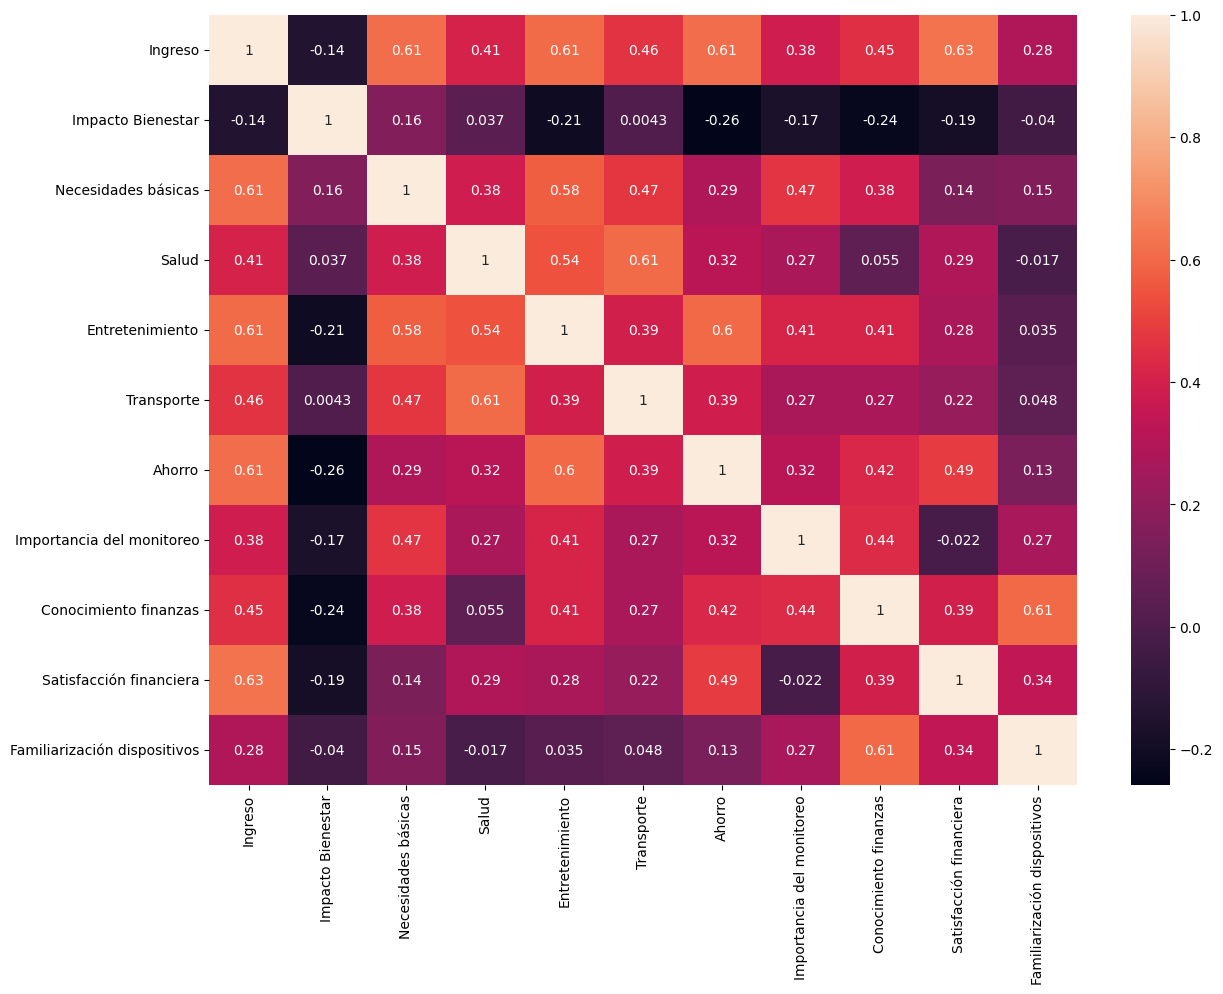

In [ ]:
# Mapa de calor
plt.figure(figsize=(14,10))
sns.heatmap(correlaciones, annot=True)
plt.show()

## 5.2 Correlaciones con deuda

In [ ]:
variables_corr_conDeuda = encuestas.iloc[:,[5,9,10,11,12,14,7,17,19,21,22,24]]

In [ ]:
# Filas sin ningun string en sus columnas
variables_corr_2 = variables_corr_conDeuda[~variables_corr_conDeuda.applymap(lambda x: isinstance(x, str)).any(axis=1)]
correlaciones_2 = variables_corr_2.corr()
correlaciones_2

<ipython-input-52-ffd33b837678>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  variables_corr_2 = variables_corr_conDeuda[~variables_corr_conDeuda.applymap(lambda x: isinstance(x, str)).any(axis=1)]


,Ingreso,Necesidades básicas,Salud,Entretenimiento,Transporte,Ahorro,Impacto Bienestar,Deuda,Importancia del monitoreo,Conocimiento finanzas,Satisfacción financiera,Familiarización dispositivos
Ingreso,1.000000,0.430937,0.317801,0.666571,0.220740,0.726158,-0.500087,0.008128,0.174968,0.609974,0.754831,0.209911
Necesidades básicas,0.430937,1.000000,-0.219853,0.516401,-0.051251,0.385832,-0.010317,0.154792,0.544077,0.592848,0.001396,0.095633
Salud,0.317801,-0.219853,1.000000,0.419111,0.500110,0.366364,-0.132790,-0.388210,-0.143004,-0.208832,0.365256,-0.276653
Entretenimiento,0.666571,0.516401,0.419111,1.000000,0.166492,0.640468,-0.361127,-0.291520,0.243251,0.457189,0.267621,0.095433
Transporte,0.220740,-0.051251,0.500110,0.166492,1.000000,0.462326,-0.133963,-0.174976,-0.145402,0.044197,0.250670,-0.316825
Ahorro,0.726158,0.385832,0.366364,0.640468,0.462326,1.000000,-0.427586,-0.072969,0.314180,0.492810,0.499962,0.071402
Impacto Bienestar,-0.500087,-0.010317,-0.132790,-0.361127,-0.133963,-0.427586,1.000000,-0.198641,-0.312270,-0.504704,-0.342074,-0.173668
Deuda,0.008128,0.154792,-0.388210,-0.291520,-0.174976,-0.072969,-0.198641,1.000000,0.489525,0.318381,0.037279,0.160688
Importancia del monitoreo,0.174968,0.544077,-0.143004,0.243251,-0.145402,0.314180,-0.312270,0.489525,1.000000,0.471405,-0.091287,0.181071
Conocimiento finanzas,0.609974,0.592848,-0.208832,0.457189,0.044197,0.492810,-0.504704,0.318381,0.471405,1.000000,0.516398,0.597505


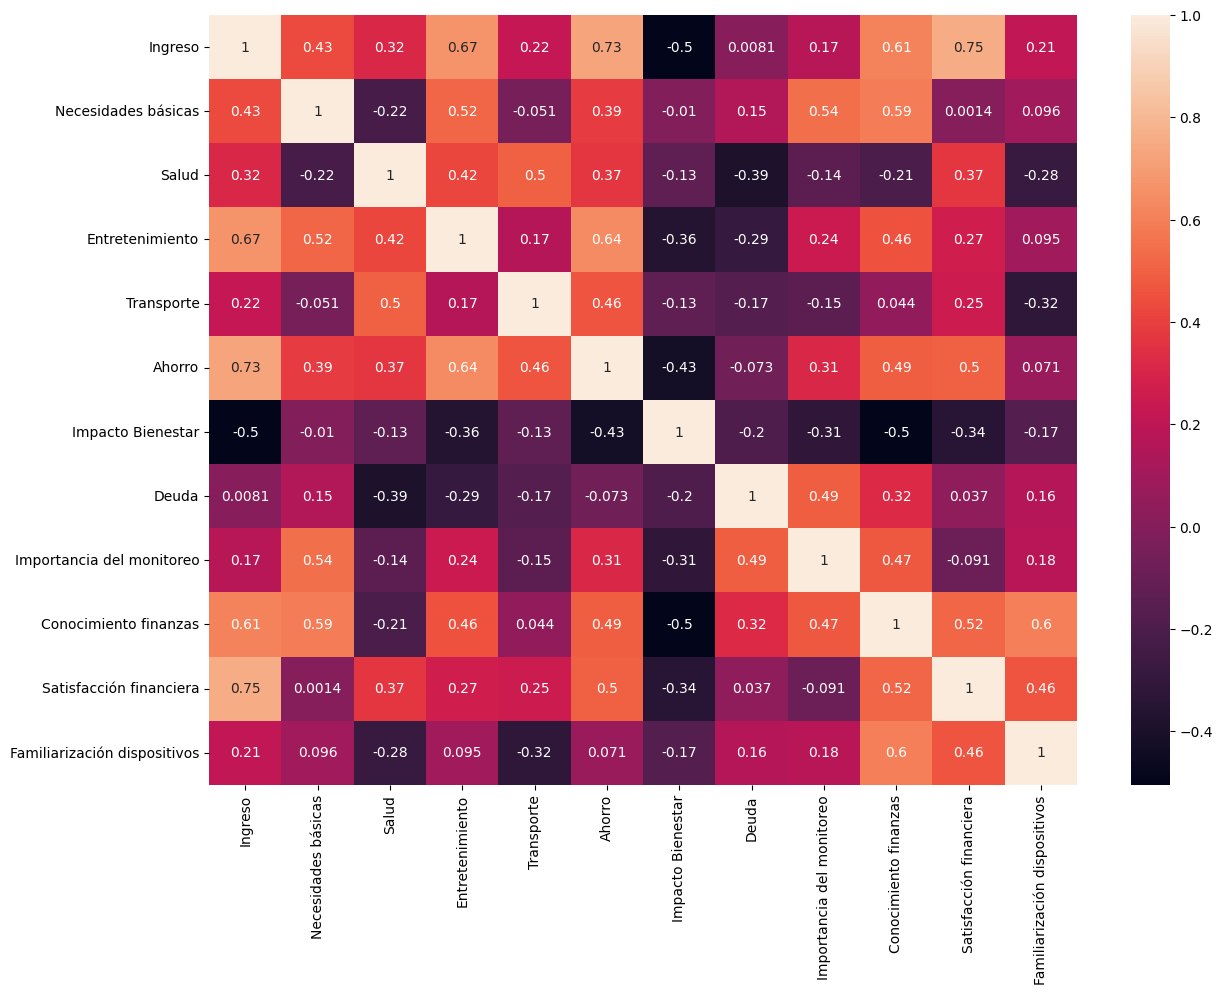

In [ ]:
# Mapa de calor
plt.figure(figsize=(14,10))
sns.heatmap(correlaciones_2, annot=True)
plt.show()

## 5.3 Correlaciones dos a dos

Para corregir este posible sesgo entre estos dos métodos se crea la siguiente función, con el fin de obtener las correlaciones y filtrar las filas no aptas en cada pareja de variables y no entre todas (así eliminamos la menor cantidad de filas posibles)

In [ ]:
def correlacion(x,y):
  concatenado = pd.concat([encuestas.iloc[:,x],encuestas.iloc[:,y]], axis=1)
  variables_corr_concatenado = concatenado[~concatenado.applymap(lambda x: isinstance(x, str)).any(axis=1)]
  #print(variables_corr_concatenado.shape)
  correlacion = variables_corr_concatenado.corr().iloc[0,1]
  return correlacion

In [ ]:
# Incluidos gastos totales y balance
indices_para_correlacion = [0,5,9,10,11,12,14,7,17,19,21,22,24,32,33]

In [ ]:
#Generar matriz de correlacion
matriz_correlacion = []
# Generar correlaciones dos a dos y construir las filas de la matriz de correlación
for i in range(len(indices_para_correlacion)):
  # Se genera la fila de correlación de cada variable
  fila_i = []
  for j in range(len(indices_para_correlacion)-1,-1,-1):
    #Se recuperael valor de la correlación de cada tabla de correlación devuelta por la función anterior
    correlacion_i_j = correlacion(indices_para_correlacion[i],indices_para_correlacion[j])
    fila_i.append(correlacion_i_j)
  # Cada fila se invierte para tener el orden correcto y se añade a la matriz de correlación
  matriz_correlacion.append(fila_i[::-1])

<ipython-input-54-3a285c19d99c>:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  variables_corr_concatenado = concatenado[~concatenado.applymap(lambda x: isinstance(x, str)).any(axis=1)]
<ipython-input-54-3a285c19d99c>:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  variables_corr_concatenado = concatenado[~concatenado.applymap(lambda x: isinstance(x, str)).any(axis=1)]
<ipython-input-54-3a285c19d99c>:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  variables_corr_concatenado = concatenado[~concatenado.applymap(lambda x: isinstance(x, str)).any(axis=1)]
<ipython-input-54-3a285c19d99c>:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  variables_corr_concatenado = concatenado[~concatenado.applymap(lambda x: isinstance(x, str)).any(axis=1)]
<ipython-input-54-3a285c19d99c>:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFr

In [ ]:
# Generamos el DataFrame a partir de la matriz de correlación
columnas = encuestas.columns
etiquetas = [columnas[i] for i in indices_para_correlacion]
matriz_correlacion_df = pd.DataFrame(matriz_correlacion, index=etiquetas, columns=etiquetas)
matriz_correlacion_df

,Edad,Ingreso,Necesidades básicas,Salud,Entretenimiento,Transporte,Ahorro,Impacto Bienestar,Deuda,Importancia del monitoreo,Conocimiento finanzas,Satisfacción financiera,Familiarización dispositivos,Gastos_totales,Balance
Edad,1.000000,0.239881,0.371968,0.256172,0.264259,0.238323,0.303908,0.166859,0.208423,0.226384,-0.017668,-0.117389,-0.355975,0.402625,-0.028300
Ingreso,0.239881,1.000000,0.578829,0.493102,0.599876,0.414873,0.540475,-0.190835,0.215687,0.181797,0.401460,0.564695,0.191034,0.664728,0.750631
Necesidades básicas,0.371968,0.578829,1.000000,0.344658,0.397338,0.346936,0.237194,0.050032,0.532295,0.248470,0.338931,0.089098,-0.022898,0.960972,-0.074976
Salud,0.256172,0.493102,0.344658,1.000000,0.453690,0.574016,0.252789,-0.005505,-0.000821,0.115606,0.033128,0.254847,-0.099723,0.561840,0.167671
Entretenimiento,0.264259,0.599876,0.397338,0.453690,1.000000,0.383013,0.553726,-0.209646,-0.149423,0.247194,0.386944,0.353586,0.113373,0.548260,0.297035
Transporte,0.238323,0.414873,0.346936,0.574016,0.383013,1.000000,0.388676,0.030605,0.011825,0.115281,0.177358,0.195485,0.043889,0.526463,0.072870
Ahorro,0.303908,0.540475,0.237194,0.252789,0.553726,0.388676,1.000000,-0.219312,0.021885,0.259009,0.373520,0.458015,0.151542,0.330779,0.421315
Impacto Bienestar,0.166859,-0.190835,0.050032,-0.005505,-0.209646,0.030605,-0.219312,1.000000,-0.151332,-0.174567,-0.300545,-0.099281,-0.053459,0.021708,-0.302248
Deuda,0.208423,0.215687,0.532295,-0.000821,-0.149423,0.011825,0.021885,-0.151332,1.000000,0.257256,0.240001,0.085802,-0.119503,0.448742,-0.037832
Importancia del monitoreo,0.226384,0.181797,0.248470,0.115606,0.247194,0.115281,0.259009,-0.174567,0.257256,1.000000,0.338174,-0.041856,0.111763,0.262222,0.019585


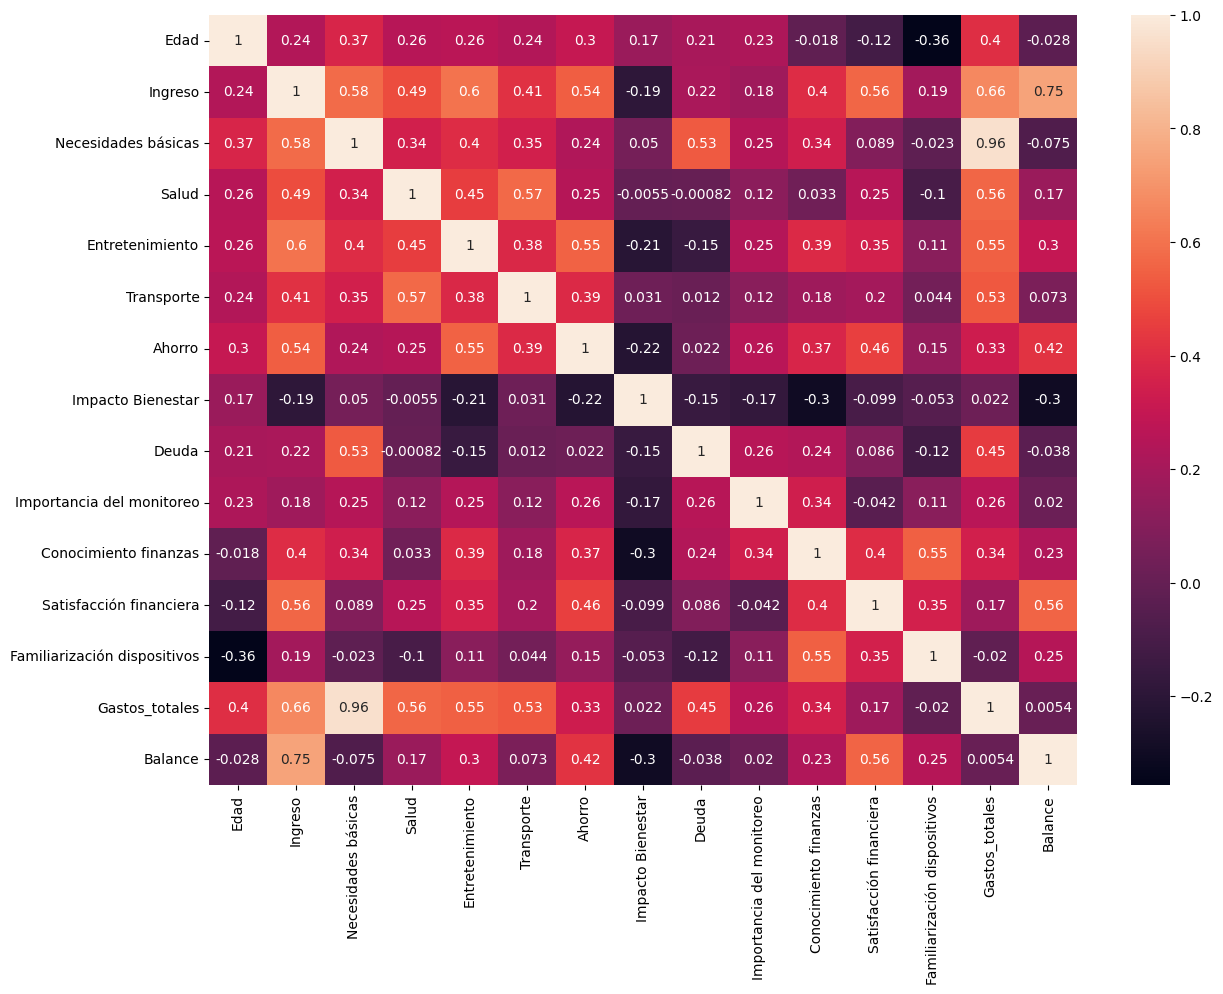

In [ ]:
# Mapa de calor
plt.figure(figsize=(14,10))
sns.heatmap(matriz_correlacion_df, annot=True)
plt.show()

<ipython-input-59-335d2f3c02ca>:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  variables_corr_concatenado = concatenado[~concatenado.applymap(lambda x: isinstance(x, str)).any(axis=1)]


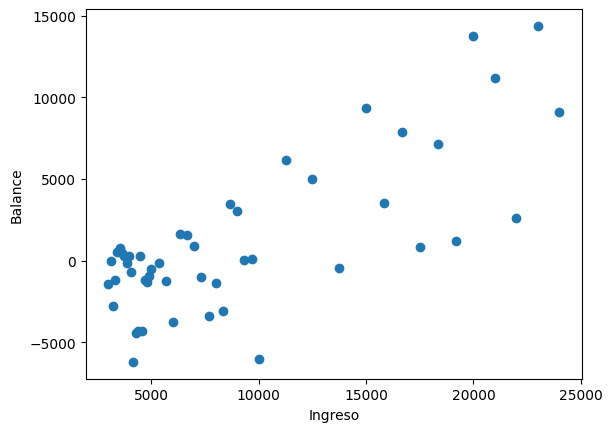

In [ ]:
#Función para generar gráficos de dispersión
def dispersion(x,y):
  concatenado = pd.concat([encuestas.iloc[:,x],encuestas.iloc[:,y]], axis=1)
  variables_corr_concatenado = concatenado[~concatenado.applymap(lambda x: isinstance(x, str)).any(axis=1)]
  #print(variables_corr_concatenado.shape)
  plt.scatter(variables_corr_concatenado.iloc[:,0], variables_corr_concatenado.iloc[:,1])
  plt.xlabel(columnas[x])
  plt.ylabel(columnas[y])
  plt.show()

dispersion(5,33)

<ipython-input-59-335d2f3c02ca>:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  variables_corr_concatenado = concatenado[~concatenado.applymap(lambda x: isinstance(x, str)).any(axis=1)]


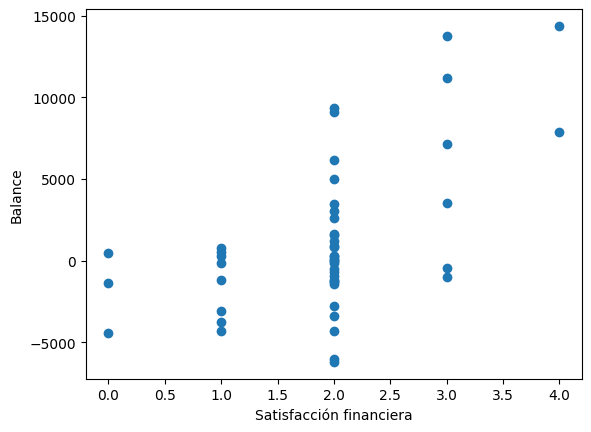

0.559125494325557


<ipython-input-54-3a285c19d99c>:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  variables_corr_concatenado = concatenado[~concatenado.applymap(lambda x: isinstance(x, str)).any(axis=1)]


In [ ]:
dispersion(22,33)
print(correlacion(22,33))

In [ ]:
for i in indices_para_correlacion:
  encuestas.iloc[:,i] = pd.to_numeric(encuestas.iloc[:,i], errors = 'coerce')
encuestas

,Edad,2. ¿Cuál es su género?,3. ¿Cuál es su estado civil?,4. ¿Realiza algún tipo de seguimiento o monitoreo sobre sus finanzas personales de manera regular?,"5. En caso de realizar seguimiento, ¿con qué frecuencia lo realiza? (Sí llega a hacer más de 1 seleccione el más importante.)",Ingreso,7. ¿Cuál es el origen principal de su ingreso mensual?,Impacto Bienestar,9. ¿En qué áreas ha beneficiado más la Pensión del Bienestar su situación financiera? (Puede seleccionar más de una opción),Necesidades básicas,...,Familiarización dispositivos,26. ¿Con cuál dispositivo digital está más familiarizado? (Puede seleccionar más de una opción),27. ¿Con qué herramientas o software está más familiarizado del entorno virtual? (Nota: Apps se refiere a aplicaciones móviles o programas de computadora),28. ¿Actualmente utiliza alguna herramienta o método para llevar un control de sus finanzas personales?,Ayuda seguimiento,"30. Si usara una herramienta para monitorear sus finanzas, ¿Qué información le gustaría recibir de primera mano? (Puede seleccionar más de una opción)",31. ¿Qué carencias o limitaciones percibe en las herramientas que utiliza actualmente o ha utilizado para gestionar sus finanzas?\n(Marque las que apliquen):,32. ¿Qué aspecto de una herramienta financiera considera más importante?,Gastos_totales,Balance
0,66,Masculino,Viudo/a,Sí,Trimestral,10000.0,Trabajo remunerado,2.0,"Gastos médicos (medicinas, consultas), Transpo...",12000.0,...,1,"Computadora, Teléfono Inteligente, Tablet","Navegadores y sitios web (Chrome. Mozilla, Mic...",Aplicaciones móviles,"Sí, algo","Saldo total disponible, Gastos realizados en e...","Es difícil de usar o entender, Requiere acceso...",Que ofrezca reportes claros y útiles,16000.0,-6000.0
1,62,Masculino,Viudo/a,No,,5000.0,Trabajo remunerado,NaN,,4000.0,...,3,"Teléfono Inteligente, Tablet","Apps de redes sociales (Facebook, X, Instagram...",Libreta o cuaderno,"Sí, algo","Saldo total disponible, Gastos realizados en e...","Es difícil de usar o entender, No utilizo ning...",Que sea fácil de usar,5500.0,-500.0
2,70,Femenino,Viudo/a,No,"No realizo seguimiento, pero me gustaría empezar",3000.0,Pensión del Bienestar,2.0,"Gastos de necesidades básicas (alimentación, v...",4210.526316,...,2,"Teléfono Celular No Inteligente (""Cacahuate"")","Apps básicas como Word, Excel, Bloc de Notas",Libreta o cuaderno,"Sí, mucho",Saldo total disponible,Es cara o tiene costos adicionales,Que ofrezca reportes claros y útiles,4410.526316,-1410.526316
3,60,Femenino,Casado/a,No,"No realizo seguimiento, pero me gustaría empezar",15000.0,Pensión del ISSSTE,NaN,"Gastos de necesidades básicas (alimentación, v...",4421.052632,...,2,"Teléfono Inteligente, Teléfono Celular No Inte...","Apps de redes sociales (Facebook, X, Instagram...",Libreta o cuaderno,"Sí, algo","Saldo total disponible, Recordatorios de pagos...","Es difícil de usar o entender, No proporciona ...",Que sea fácil de usar,5621.052632,9378.947368
4,70,Masculino,Viudo/a,Sí,Mensual,20000.0,70 y +,3.0,"Gastos de necesidades básicas (alimentación, v...",4631.578947,...,2,"Computadora, Teléfono Inteligente, Tablet","Navegadores y sitios web (Chrome. Mozilla, Mic...",Libreta o cuaderno,"Sí, mucho","Saldo total disponible, Gastos realizados en e...","Es difícil de usar o entender, Requiere acceso...",Que ofrezca reportes claros y útiles,6262.134503,13737.865497
5,68,Masculino,Divorciado/a,Sí,Mensual,15833.333333,Trabajo remunerado,1.0,"Gastos de necesidades básicas (alimentación, v...",8000.0,...,2,"Computadora, Teléfono Inteligente, Teléfono Ce...","Navegadores y sitios web (Chrome. Mozilla, Mic...",Aplicaciones móviles,"Sí, mucho","Gastos realizados en el mes, Recordatorios de ...","No proporciona la información que necesito, Es...",Que ofrezca reportes claros y útiles,12296.428571,3536.904762
6,70,Masculino,En unión libre,No,"No realizo seguimiento, pero me gustaría empezar",16666.666667,Trabajo remunerado,1.0,"Gastos de necesidades básicas (alimentación, v...",4842.105263,..

In [ ]:
balance_negativo =encuestas[encuestas['Balance'] < 0].Balance.count()
balance_neg_con_ahorro = encuestas[(encuestas['Balance'] < 0) & (encuestas['Ahorro'] > 0)].shape[0]

In [ ]:
print(f'Personas con un balance negativo: {balance_negativo}\nPersonas con balance negativo con ahorro {balance_neg_con_ahorro}')

Personas con un balance negativo: 23
Personas con balance negativo con ahorro 16


In [ ]:
list(encuestas.columns)

['Edad',
 '2. ¿Cuál es su género? ',
 '3. ¿Cuál es su estado civil?  ',
 '4. ¿Realiza algún tipo de seguimiento o monitoreo sobre sus finanzas personales de manera regular?  ',
 '5. En caso de realizar seguimiento, ¿con qué frecuencia lo realiza? (Sí llega a hacer más de 1 seleccione el más importante.)',
 'Ingreso',
 '7. ¿Cuál es el origen principal de su ingreso mensual?  ',
 'Impacto Bienestar',
 '9. ¿En qué áreas ha beneficiado más la Pensión del Bienestar su situación financiera? (Puede seleccionar más de una opción)',
 'Necesidades básicas',
 'Salud',
 'Entretenimiento',
 'Transporte',
 '14. ¿Ahorras?',
 'Ahorro',
 '16. ¿En dónde lo ahorras?',
 '17. ¿Tiene algún tipo de deuda actualmente (préstamos personales, hipotecas, tarjetas de crédito, etc.)?  ',
 'Deuda',
 'Capacidad deudas',
 'Importancia del monitoreo',
 '21. ¿Tiene alguna estrategia financiera o algún tipo de presupuesto?  ',
 'Conocimiento finanzas',
 'Satisfacción financiera',
 '24. ¿Le interesaría realizar un seguimi